# Working with a loom matrix service output

Below are some examples of working with a loom-formatted output file from the HCA Matrix Service. The file in question is created from the "Single cell transcriptome analysis of human pancreas" project that is one of the HCA beta datasets.

To start, install `scanpy` and `loompy`:

In [34]:
import sys
!{sys.executable} -m pip install scanpy loompy

Now, "connect" to the loom file using `loompy` and investigate it.

In [5]:
import loompy
ds = loompy.connect("Single_cell_transcriptome_analysis_of_human_pancreas.loom")

In [6]:
ds.shape

(63880, 2544)

The shape tells us that this dataset has 2,544 cells and reference used has 63,880 annotated genes. Some information about those genes is available in the loom row attributes:

In [7]:
ds.ra.keys()

['Accession',
 'Gene',
 'chromosome',
 'featureend',
 'featurestart',
 'featuretype',
 'isgene']

In [22]:
print(ds.ra["Accession"][30000:30015])
print(ds.ra["Gene"][30000:30015])
print(ds.ra["chromosome"][30000:30015])

['ENSG00000250426' 'ENSG00000260459' 'ENSG00000233952' 'ENSG00000229735'
 'ENSG00000228347' 'ENSG00000230214' 'ENSG00000237913' 'ENSG00000232368'
 'ENSG00000226608' 'ENSG00000214020' 'ENSG00000266989' 'ENSG00000254984'
 'ENSG00000232217' 'ENSG00000181867' 'ENSG00000140718']
['FTLP10' 'FTLP14' 'FTLP15' 'FTLP16' 'FTLP17' 'FTLP18' 'FTLP19' 'FTLP2'
 'FTLP3' 'FTLP4' 'FTLP5' 'FTLP6' 'FTLP8' 'FTMT' 'FTO']
['chr4' 'chr16' 'chr7' 'chrX' 'chr1' 'chr1' 'chr10' 'chrX' 'chr20' 'chr9'
 'chr19' 'chr11' 'chr13' 'chr5' 'chr16']


The Ensembl ids of the genes are stored as "Accession", and the symbol is stored as "Gene". This follows the published loom conventions. Cell metadata is available as column attributes:

In [13]:
ds.ca.keys()

['CellID',
 'bundle_fqid',
 'construction_approach_label',
 'construction_approach_ontology',
 'development_stage_label',
 'development_stage_ontology',
 'disease_label',
 'disease_ontology',
 'end_bias',
 'ethnicity_label',
 'ethnicity_ontology',
 'genes_detected',
 'genus_species_label',
 'genus_species_ontology',
 'input_nucleic_acid_label',
 'input_nucleic_acid_ontology',
 'librarykey',
 'organ_label',
 'organ_ontology',
 'organ_part_label',
 'organ_part_ontology',
 'protocol',
 'short_name',
 'specimenkey',
 'strand']

In [17]:
print(set(ds.ca["short_name"]))
print(set(ds.ca["construction_approach_ontology"]))
print(set(ds.ca["construction_approach_label"]))
print(ds.ca["genes_detected"][:30])

{'Single cell transcriptome analysis of human pancreas'}
{'EFO:0008931'}
{'Smart-seq2'}
[5629 3951 2042 5492 6008 4890  847  527 4123 3340 5514 5335 4293 7975 5841
 3259  766 3202 2620 2830 6088 4635 7473 3424 4601 3531 4834 7173 2553 4198]


All of these cells are from a single project, so much of the metadata is the same across all cells. Also note that often metadata fields come in pairs: one field that stores the ontology value and one that stores the ontology label. Now, let's load this file into scanpy.

In [23]:
import scanpy
adata = scanpy.read_loom("Single_cell_transcriptome_analysis_of_human_pancreas.loom")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Scanpy reads the loom file correctly, but note that by default, scanpy uses the "Gene" field for variable names. It correctly complains that those are not unique. We can fix that by using scanpy's method, or we can specify the "Accession" field for variable names.

In [24]:
adata = scanpy.read_loom("Single_cell_transcriptome_analysis_of_human_pancreas.loom", var_names="Accession")

Now we can do whatever we want with scanpy:

In [28]:
import scanpy.api as sc
sc.pp.filter_genes(adata, min_counts=1)
adata.shape
sc.pp.normalize_per_cell(adata)

In [30]:
sc.pp.neighbors(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'construction_approach_label' as categorical
... storing 'construction_approach_ontology' as categorical
... storing 'disease_label' as categorical
... storing 'disease_ontology' as categorical
... storing 'end_bias' as categorical
... storing 'ethnicity_label' as categorical
... storing 'ethnicity_ontology' as categorical
... storing 'genus_species_label' as categorical
... storing 'genus_species_ontology' as categorical
... storing 'input_nucleic_acid_label' as categorical
... storing 'input_nucleic_acid_ontology' as categorical
... storing 'librarykey' as categorical
... storing 'organ_label' as categorical
... storing 'organ_ontology' as categorical
... storing 'organ_part_label' as categorical
... storing 'organ_part_ontology' as categorical
... storing 'protocol' as categorical
... storing 'short_name' as categorical
... storing 'specimenkey' as categorical
... storing 'strand' as categorical
... storing 'Gene' as categorical
... storing 'chromosome' as categorical
..

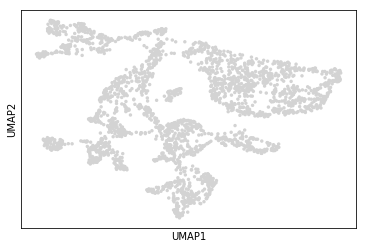

In [33]:
sc.tl.umap(adata)
sc.pl.umap(adata)